In [40]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import itertools
import random
from scipy.spatial.distance import pdist, squareform

# add path to model directory
sys.path.insert(0,'/home/sbose/out_there/FederatedPersonalizedLoadForecasting')

# load datas
data_CA = np.load('/home/sbose/out_there/FederatedPersonalizedLoadForecasting/NRELCAdataset.npz')['data']
data_IL = np.load('/home/sbose/out_there/FederatedPersonalizedLoadForecasting/NRELILdataset.npz')['data']
data_NY = np.load('/home/sbose/out_there/FederatedPersonalizedLoadForecasting/NRELNYdataset.npz')['data']

In [41]:
def plot_correlation_matrix(data):
    num_clients, time_idx = data.shape

    # Compute correlation matrix
    correlation_matrix = np.corrcoef(data)

    # Plot correlation matrix
    fig, ax = plt.subplots(figsize=(12, 12))
    cax = ax.matshow(correlation_matrix, cmap='coolwarm')

    # Add color bar
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=20)

    # Set labels
    ax.set_xticks(np.arange(num_clients))
    ax.set_yticks(np.arange(num_clients))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Draw grid lines for separation
    ax.set_xticks(np.arange(-.5, num_clients, 1), minor=True)
    ax.set_yticks(np.arange(-.5, num_clients, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)

    # Set title
    ax.set_title(f"Correlation among {num_clients} clients", pad=20, fontsize=30)

    plt.tight_layout()
    return fig, ax

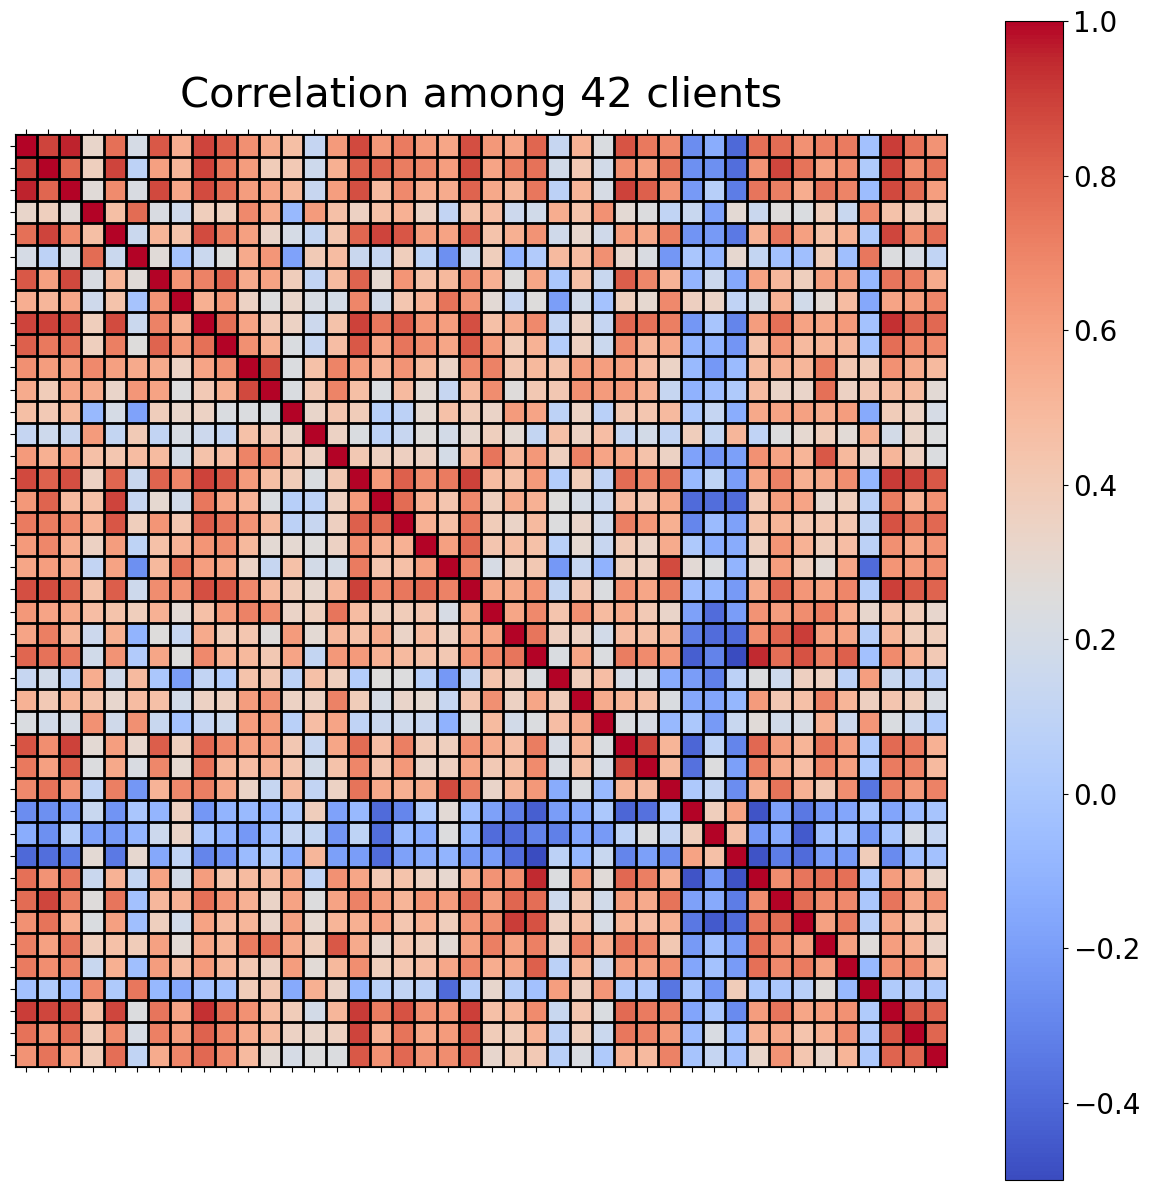

In [42]:
f,a = plot_correlation_matrix(data_NY[:,:,0])
plt.savefig('corr.pdf')

In [43]:
def plot_distance_matrix(data):
    num_clients, time_idx = data.shape

    # Compute shape-based distance matrix (invariant to scale)
    distance_matrix = squareform(pdist(data, metric='cosine'))

    # Plot distance matrix
    fig, ax = plt.subplots(figsize=(12, 12))
    cax = ax.matshow(distance_matrix, cmap='coolwarm')

    # Add color bar
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=20)

    # Set labels
    ax.set_xticks(np.arange(num_clients))
    ax.set_yticks(np.arange(num_clients))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Draw grid lines for separation
    ax.set_xticks(np.arange(-.5, num_clients, 1), minor=True)
    ax.set_yticks(np.arange(-.5, num_clients, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)

    # Set title
    ax.set_title(f"Shape-based Distance among {num_clients} clients", pad=20, fontsize=30)

    plt.tight_layout()
    return fig, ax

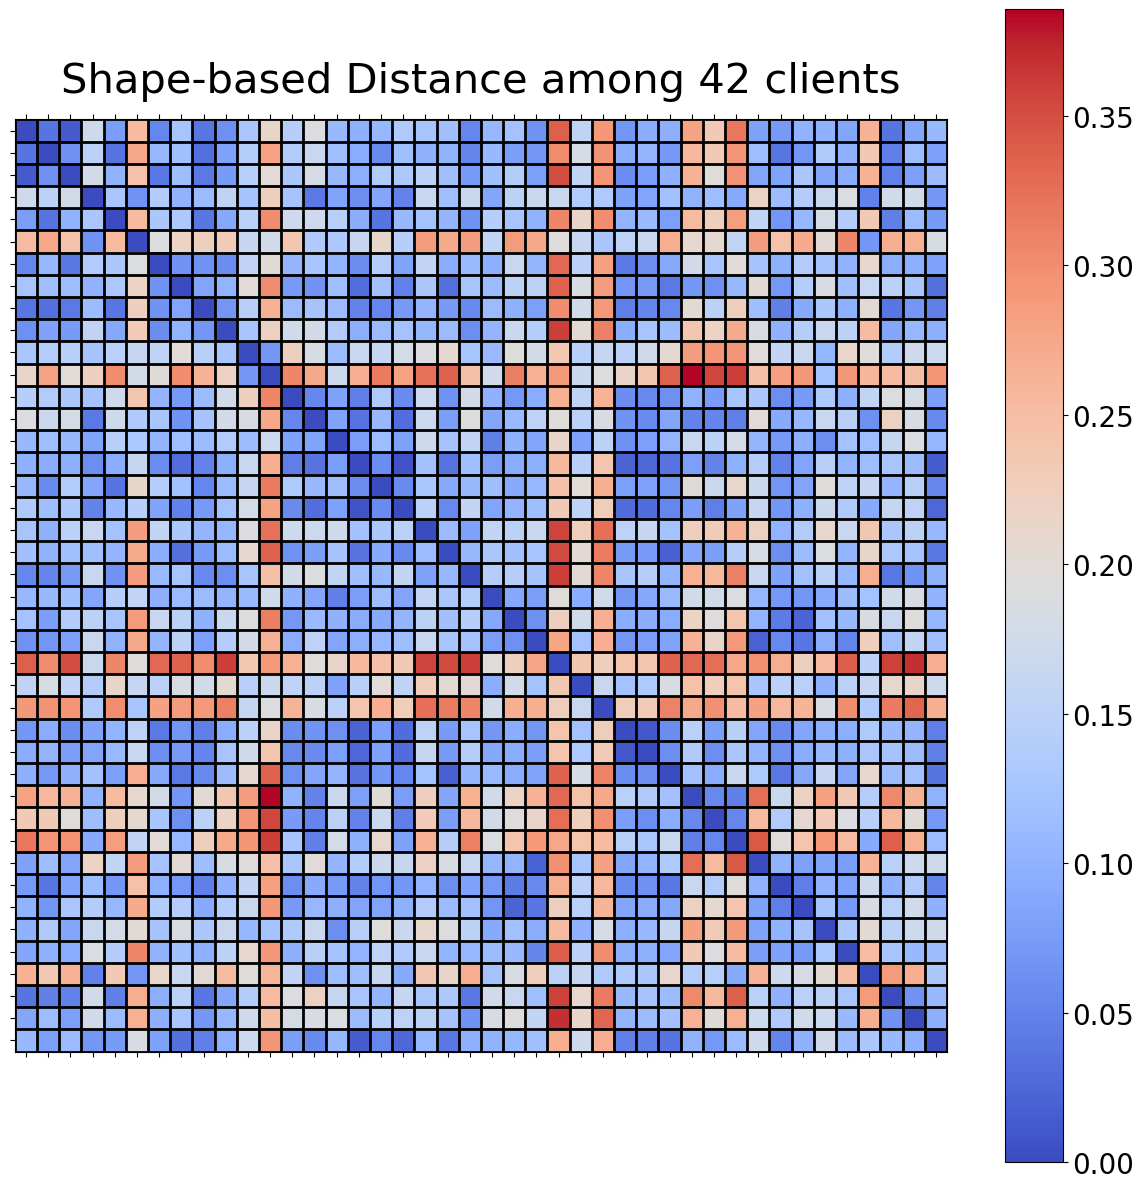

In [44]:
f,a = plot_distance_matrix(data_NY[:,:,0])
plt.savefig('sbd.pdf')

In [45]:
def plot_distance_matrix(data):
    num_clients, time_idx = data.shape

    # Compute scale-based distance matrix
    distance_matrix = squareform(pdist(data, metric='braycurtis'))

    # Plot distance matrix
    fig, ax = plt.subplots(figsize=(12, 12))
    cax = ax.matshow(distance_matrix, cmap='coolwarm')

    # Add color bar
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=20)

    # Set labels
    ax.set_xticks(np.arange(num_clients))
    ax.set_yticks(np.arange(num_clients))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Draw grid lines for separation
    ax.set_xticks(np.arange(-.5, num_clients, 1), minor=True)
    ax.set_yticks(np.arange(-.5, num_clients, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)

    # Set title
    ax.set_title(f"Scale-based Distance among {num_clients} clients", pad=20, fontsize=30)

    plt.tight_layout()
    return fig, ax

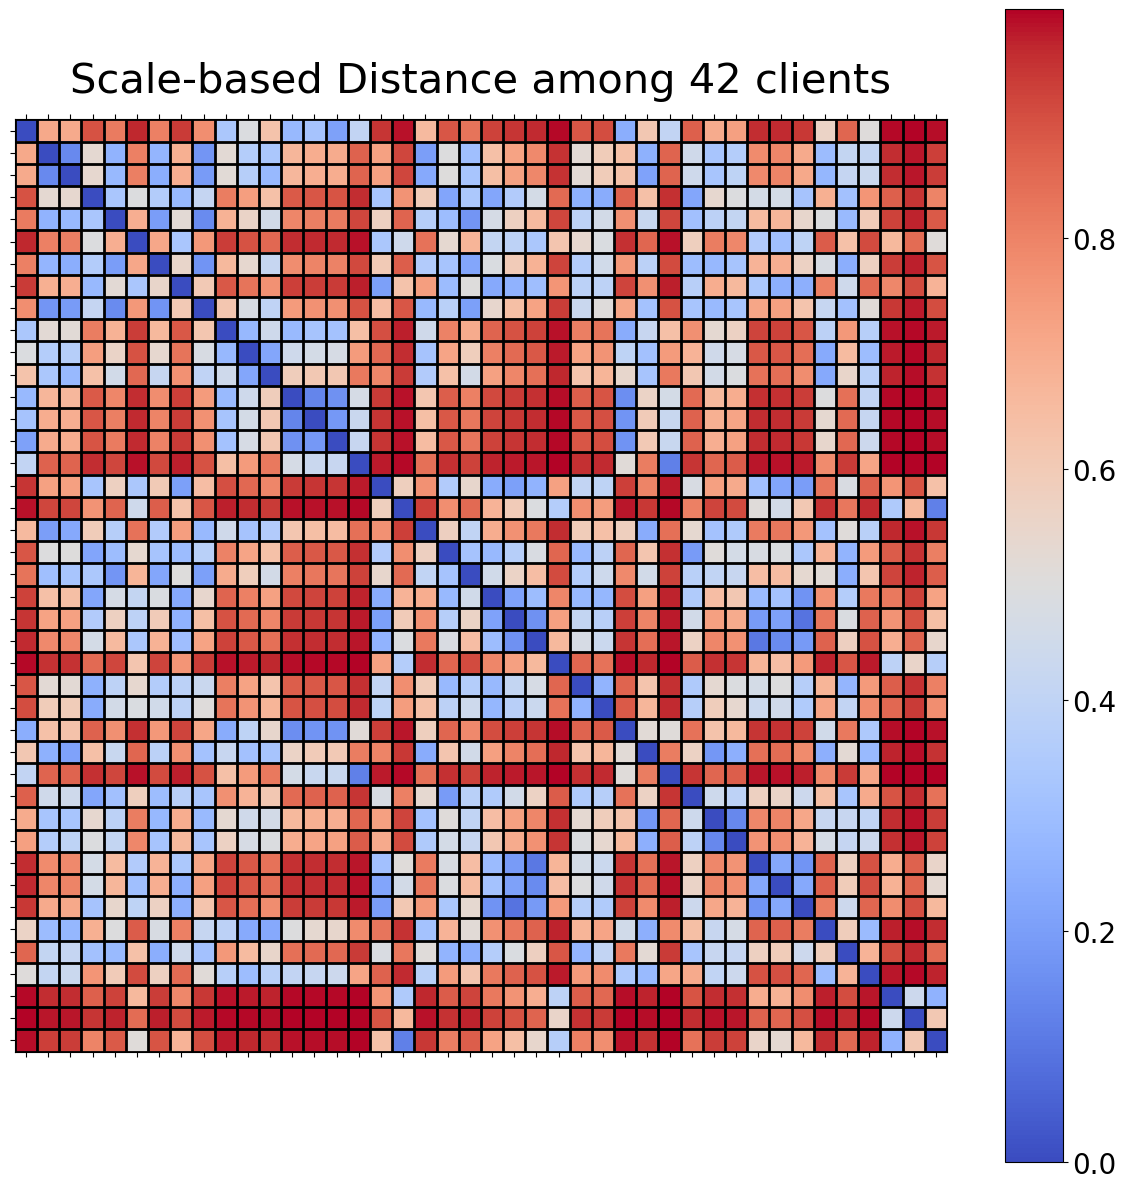

In [46]:
f,a = plot_distance_matrix(data_NY[:,:,0])
plt.savefig('scalebd.pdf')